<a href="https://colab.research.google.com/github/owen198/csc_domain_adaptation/blob/main/csc_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import random

from sklearn import preprocessing
from sklearn import svm
from sklearn import cluster
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

from keras import metrics
from keras import models
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Input, BatchNormalization, Activation
from keras.callbacks import EarlyStopping

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
path = './gdrive/My Drive/data/CSC/W4/'

In [5]:
tag_pd = pd.read_csv(path+'csc_w4.csv')

In [6]:
b_trend = True

In [7]:
drop_list = ['Unnamed: 0','_id','type','scada','timestamp','device', 'datetime']

In [8]:
#oneClass_predictor = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)

In [9]:
def normalization (normal_df):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_names = list(normal_df)
    
    min_max_scaler = min_max_scaler.fit(normal_df.values)
    X_raw_minmax = min_max_scaler.transform(normal_df.values)
    normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)

    #X_raw_minmax = min_max_scaler.fit_transform(normal_df.values)
    #normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)
    
    return normal_df, min_max_scaler

In [10]:
def scorer_(Y_pred):
    a = (Y_pred[Y_pred == -1].size)/(Y_pred.size)
    return a*100

In [11]:
def plot_trend(data_df, 
               s_date, 
               e_date, 
               normalizer,
               predict_model):

    delta = datetime.timedelta(days=1)

    score_list = []
    datetime_list = []

    while s_date <= e_date:

        validation_df = data_df[(data_df['datetime'] > s_date) & 
                                (data_df['datetime'] <= s_date + delta)]


        if len(validation_df) > 0:
        
            validation_df = validation_df.drop(columns=drop_list)
            validation_df = normalizer.transform(validation_df)
            validation_df = predict_model.predict(validation_df)

            score_list.append(scorer_(validation_df))
            datetime_list.append(s_date)

            #print(s_date, scorer_(validation_df))

        s_date += delta

    
    # plot
    fig, ax = plt.subplots(figsize=(6, 3))
    plt.xticks(rotation=45)
    #index = -100

    ax.plot(datetime_list, score_list, marker='.')
    ax.set(xlabel='date', ylabel='health score')
    ax.set_ylim([0, 110])

    #ax.legend()
    ax.grid()
    plt.tight_layout()
    #fig.savefig('score.png', dpi=300)

    #fig.savefig(path+tag+'-'+training_from.strftime("%Y%m%d")+'-'+training_to.strftime("%Y%m%d")+'.png', dpi=300)
    plt.show()

In [12]:
def check_duration(data_df, training_from, training_to, e_date):

    oneClass_predictor = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)

    data_df['datetime'] = data_df['timestamp'].astype('int').astype("datetime64[s]")

    training_df = data_df[(data_df['datetime'] > training_from) &
                          (data_df['datetime'] < training_to)]

    training_df = training_df.drop(columns=drop_list)
    training_df, normalizer = normalization(training_df)
    predict_model = oneClass_predictor.fit(training_df)

    plot_trend (data_df, training_from, e_date, normalizer, predict_model)

    return data_df, predict_model, normalizer


In [13]:
def get_score (data_df, predict_model, normalizer, s_date, training_to, e_date):

    delta = datetime.timedelta(days=1)

    score_list = []
    datetime_list = []

    while s_date <= e_date:

        validation_df = data_df[(data_df['datetime'] > s_date) & 
                                (data_df['datetime'] <= s_date + delta)]

        if len(validation_df) > 0:
        
            validation_df = validation_df.drop(columns=drop_list)
            validation_df = normalizer.transform(validation_df)
            validation_df = predict_model.predict(validation_df)

            score_list.append(scorer_(validation_df))
            datetime_list.append(s_date)

        s_date += delta

    return datetime_list, score_list

# Check Abnormal Duration

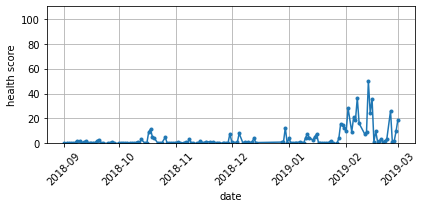

43518


In [14]:
W4633070102 = pd.concat([pd.read_csv(path+'W4633070102'+'_201809.csv'),
                         pd.read_csv(path+'W4633070102'+'_201810.csv'),
                         pd.read_csv(path+'W4633070102'+'_201811.csv'),
                         pd.read_csv(path+'W4633070102'+'_201812.csv'),
                         pd.read_csv(path+'W4633070102'+'_201901.csv'),
                         pd.read_csv(path+'W4633070102'+'_201902.csv'),
                         pd.read_csv(path+'W4633070102'+'_201903.csv')])

if b_trend:
    _, W4633070102_model, W4633070102_normalizer = check_duration (W4633070102, 
                                                                    datetime.datetime(2018,9,1,0,0), 
                                                                    datetime.datetime(2018,12,1,0,0), 
                                                                    datetime.datetime(2019,3,1,0,0))

print(len(W4633070102))

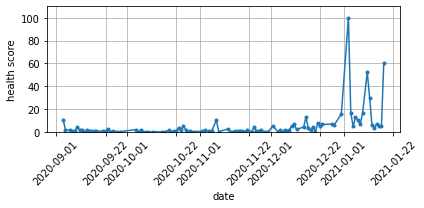

17017


In [15]:
W4633080200 = pd.concat([pd.read_csv(path+'W4633080200'+'_202009.csv'),
                         pd.read_csv(path+'W4633080200'+'_202010.csv'),
                         pd.read_csv(path+'W4633080200'+'_202011.csv'),
                         pd.read_csv(path+'W4633080200'+'_202012.csv'),
                         pd.read_csv(path+'W4633080200'+'_202101.csv')])

if b_trend:
    _, W4633080200_model, W4633080200_normalizer = check_duration (W4633080200, 
                                                                    datetime.datetime(2020,9,1,0,0), 
                                                                    datetime.datetime(2020,12,1,0,0), 
                                                                    datetime.datetime(2021,2,1,0,0))

print(len(W4633080200))

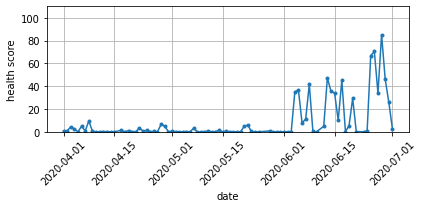

100873


In [16]:
W4662FM0400 = pd.concat([pd.read_csv(path+'W4662FM0400'+'_202003.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202004.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202005.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202006.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202007.csv')])

if b_trend:
    _, W4662FM0400_model, W4662FM0400_normalizer = check_duration (W4662FM0400, 
                                                                    datetime.datetime(2020,4,1,0,0), 
                                                                    datetime.datetime(2020,6,1,0,0), 
                                                                    datetime.datetime(2020,7,1,0,0))

print(len(W4662FM0400))

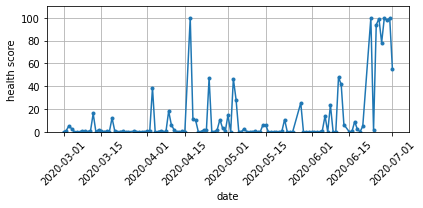

60900


In [17]:
W4662FM0605 = pd.concat([pd.read_csv(path+'W4662FM0605'+'_202003.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202004.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202005.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202006.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202007.csv')])

if b_trend:
    _, W4662FM0605_model, W4662FM0605_normalizer = check_duration (W4662FM0605, 
                                                                  datetime.datetime(2020,3,1,0,0), 
                                                                  datetime.datetime(2020,4,1,0,0), 
                                                                  datetime.datetime(2020,7,1,0,0))

print(len(W4662FM0605))

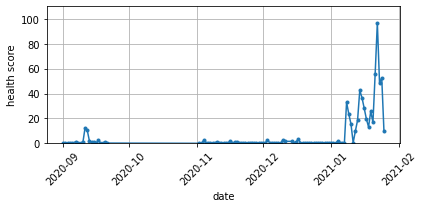

51829


In [18]:
W4662FM0606 = pd.concat([pd.read_csv(path+'W4662FM0606'+'_202009.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202010.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202011.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202012.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202101.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202102.csv')])

if b_trend:
    _, W4662FM0606_model, W4662FM0606_normalizer = check_duration (W4662FM0606, 
                                                                    datetime.datetime(2020,9,1,0,0), 
                                                                    datetime.datetime(2021,1,1,0,0), 
                                                                    datetime.datetime(2021,2,1,0,0))

print(len(W4662FM0606))

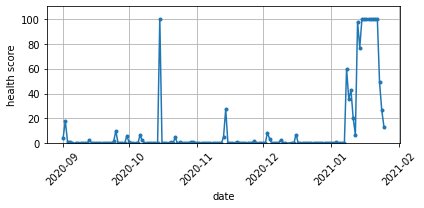

65874


In [19]:
W4662FM0507 = pd.concat([pd.read_csv(path+'W4662FM0507'+'_202009.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202010.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202011.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202012.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202101.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202102.csv')])

if b_trend:
    _, W4662FM0507_model, W4662FM0507_normalizer = check_duration (W4662FM0507, 
                                                                    datetime.datetime(2020,9,1,0,0), 
                                                                    datetime.datetime(2021,1,1,0,0), 
                                                                    datetime.datetime(2021,2,1,0,0))

print(len(W4662FM0507))

In [37]:
disp_label = ['102', 
         '200',
         '400',
         '507',
         '605',
         '606']

label = ['W4633070102', 
         'W4633080200',
         'W4662FM0400',
         'W4662FM0507',
         'W4662FM0605',
         'W4662FM0606']

color = ['tab:blue',
         'dimgray',
         'slategrey',
         'gray',
         'darkgray',
         'silver',
         'lightgrey']

datetime_list_102_102 score_list_102_102 W4633070102 W4633070102_model W4633070102_normalizer 2018-09-01 00:00:00 2018-12-01 00:00:00 2019-03-01 00:00:00
datetime_list_102_102 score_list_102_200 W4633070102 W4633080200_model W4633070102_normalizer 2018-09-01 00:00:00 2018-12-01 00:00:00 2019-03-01 00:00:00
datetime_list_102_102 score_list_102_400 W4633070102 W4662FM0400_model W4633070102_normalizer 2018-09-01 00:00:00 2018-12-01 00:00:00 2019-03-01 00:00:00
datetime_list_102_102 score_list_102_507 W4633070102 W4662FM0507_model W4633070102_normalizer 2018-09-01 00:00:00 2018-12-01 00:00:00 2019-03-01 00:00:00
datetime_list_102_102 score_list_102_605 W4633070102 W4662FM0605_model W4633070102_normalizer 2018-09-01 00:00:00 2018-12-01 00:00:00 2019-03-01 00:00:00
datetime_list_102_102 score_list_102_606 W4633070102 W4662FM0606_model W4633070102_normalizer 2018-09-01 00:00:00 2018-12-01 00:00:00 2019-03-01 00:00:00
score_list_102_102 score_list_102_102 0.0
score_list_102_102 score_list_102_

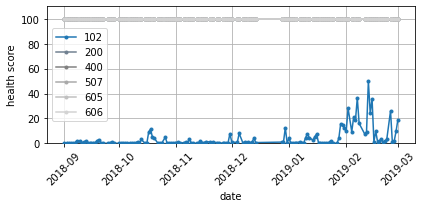

datetime_list_200_200 score_list_200_102 W4633080200 W4633070102_model W4633080200_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_200_200 score_list_200_200 W4633080200 W4633080200_model W4633080200_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_200_200 score_list_200_400 W4633080200 W4662FM0400_model W4633080200_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_200_200 score_list_200_507 W4633080200 W4662FM0507_model W4633080200_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_200_200 score_list_200_605 W4633080200 W4662FM0605_model W4633080200_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_200_200 score_list_200_606 W4633080200 W4662FM0606_model W4633080200_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
score_list_200_200 score_list_200_102 95.94261539379
score_list_200_200 scor

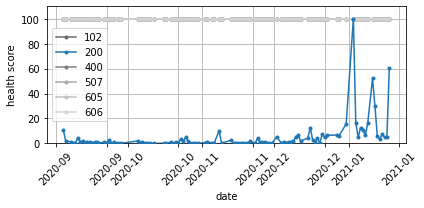

datetime_list_400_400 score_list_400_102 W4662FM0400 W4633070102_model W4662FM0400_normalizer 2020-03-01 00:00:00 2020-05-01 00:00:00 2020-07-01 00:00:00
datetime_list_400_400 score_list_400_200 W4662FM0400 W4633080200_model W4662FM0400_normalizer 2020-03-01 00:00:00 2020-05-01 00:00:00 2020-07-01 00:00:00
datetime_list_400_400 score_list_400_400 W4662FM0400 W4662FM0400_model W4662FM0400_normalizer 2020-03-01 00:00:00 2020-05-01 00:00:00 2020-07-01 00:00:00
datetime_list_400_400 score_list_400_507 W4662FM0400 W4662FM0507_model W4662FM0400_normalizer 2020-03-01 00:00:00 2020-05-01 00:00:00 2020-07-01 00:00:00
datetime_list_400_400 score_list_400_605 W4662FM0400 W4662FM0605_model W4662FM0400_normalizer 2020-03-01 00:00:00 2020-05-01 00:00:00 2020-07-01 00:00:00
datetime_list_400_400 score_list_400_606 W4662FM0400 W4662FM0606_model W4662FM0400_normalizer 2020-03-01 00:00:00 2020-05-01 00:00:00 2020-07-01 00:00:00
score_list_400_400 score_list_400_102 94.12236786438517
score_list_400_400 s

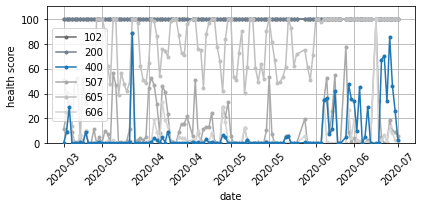

datetime_list_507_507 score_list_507_102 W4662FM0507 W4633070102_model W4662FM0507_normalizer 2020-09-01 00:00:00 2020-12-01 00:00:00 2021-02-01 00:00:00
datetime_list_507_507 score_list_507_200 W4662FM0507 W4633080200_model W4662FM0507_normalizer 2020-09-01 00:00:00 2020-12-01 00:00:00 2021-02-01 00:00:00
datetime_list_507_507 score_list_507_400 W4662FM0507 W4662FM0400_model W4662FM0507_normalizer 2020-09-01 00:00:00 2020-12-01 00:00:00 2021-02-01 00:00:00
datetime_list_507_507 score_list_507_507 W4662FM0507 W4662FM0507_model W4662FM0507_normalizer 2020-09-01 00:00:00 2020-12-01 00:00:00 2021-02-01 00:00:00
datetime_list_507_507 score_list_507_605 W4662FM0507 W4662FM0605_model W4662FM0507_normalizer 2020-09-01 00:00:00 2020-12-01 00:00:00 2021-02-01 00:00:00
datetime_list_507_507 score_list_507_606 W4662FM0507 W4662FM0606_model W4662FM0507_normalizer 2020-09-01 00:00:00 2020-12-01 00:00:00 2021-02-01 00:00:00
score_list_507_507 score_list_507_102 93.74992514386695
score_list_507_507 s

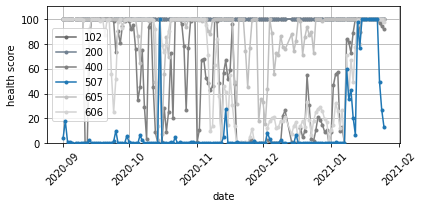

datetime_list_605_605 score_list_605_102 W4662FM0605 W4633070102_model W4662FM0605_normalizer 2020-03-01 00:00:00 2020-04-01 00:00:00 2020-07-01 00:00:00
datetime_list_605_605 score_list_605_200 W4662FM0605 W4633080200_model W4662FM0605_normalizer 2020-03-01 00:00:00 2020-04-01 00:00:00 2020-07-01 00:00:00
datetime_list_605_605 score_list_605_400 W4662FM0605 W4662FM0400_model W4662FM0605_normalizer 2020-03-01 00:00:00 2020-04-01 00:00:00 2020-07-01 00:00:00
datetime_list_605_605 score_list_605_507 W4662FM0605 W4662FM0507_model W4662FM0605_normalizer 2020-03-01 00:00:00 2020-04-01 00:00:00 2020-07-01 00:00:00
datetime_list_605_605 score_list_605_605 W4662FM0605 W4662FM0605_model W4662FM0605_normalizer 2020-03-01 00:00:00 2020-04-01 00:00:00 2020-07-01 00:00:00
datetime_list_605_605 score_list_605_606 W4662FM0605 W4662FM0606_model W4662FM0605_normalizer 2020-03-01 00:00:00 2020-04-01 00:00:00 2020-07-01 00:00:00
score_list_605_605 score_list_605_102 92.2697084416201
score_list_605_605 sc

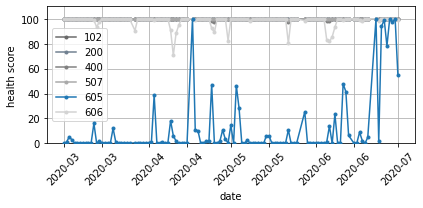

datetime_list_606_606 score_list_606_102 W4662FM0606 W4633070102_model W4662FM0606_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_606_606 score_list_606_200 W4662FM0606 W4633080200_model W4662FM0606_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_606_606 score_list_606_400 W4662FM0606 W4662FM0400_model W4662FM0606_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_606_606 score_list_606_507 W4662FM0606 W4662FM0507_model W4662FM0606_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_606_606 score_list_606_605 W4662FM0606 W4662FM0605_model W4662FM0606_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
datetime_list_606_606 score_list_606_606 W4662FM0606 W4662FM0606_model W4662FM0606_normalizer 2020-09-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00
score_list_606_606 score_list_606_102 95.24675811308605
score_list_606_606 s

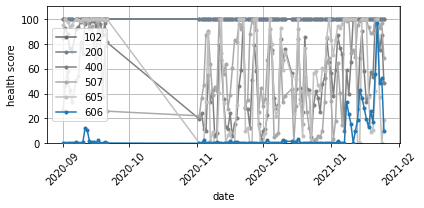

In [39]:
import matplotlib.dates as mdates

for target, data in zip(disp_label, label):
    for source, model in zip(disp_label, label):
        #print(target, source)

        training_from_month = int(tag_pd[(tag_pd['tag']==data) & (tag_pd['Normal']==1)].head(1)['data'].values[0].split('_')[1].split('.')[0][4:6])
        training_from_year = int(tag_pd[(tag_pd['tag']==data) & (tag_pd['Normal']==1)].head(1)['data'].values[0].split('_')[1].split('.')[0][0:4])
        training_to_month = int(tag_pd[(tag_pd['tag']==data) & (tag_pd['Normal']==1)].tail(1)['data'].values[0].split('_')[1].split('.')[0][4:6])
        training_to_year = int(tag_pd[(tag_pd['tag']==data) & (tag_pd['Normal']==1)].tail(1)['data'].values[0].split('_')[1].split('.')[0][0:4])
        end_month = int(tag_pd[(tag_pd['tag']==data) & (tag_pd['Normal']==0)].tail(1)['data'].values[0].split('_')[1].split('.')[0][4:6])
        end_year = int(tag_pd[(tag_pd['tag']==data) & (tag_pd['Normal']==0)].tail(1)['data'].values[0].split('_')[1].split('.')[0][0:4])

        #datetime_list_102_102, score_list_102_102 = get_score (W4633070102, W4633070102_model, W4633070102_normalizer, datetime.datetime(2018,9,1,0,0), datetime.datetime(2018,12,1,0,0), datetime.datetime(2019,3,1,0,0))
        #datetime_list_102_102, score_list_102_200 = get_score (W4633070102, W4633080200_model, W4633070102_normalizer, datetime.datetime(2018,9,1,0,0), datetime.datetime(2018,12,1,0,0), datetime.datetime(2019,3,1,0,0))
        #datetime_list_102_102, score_list_102_400 = get_score (W4633070102, W4662FM0400_model, W4633070102_normalizer, datetime.datetime(2018,9,1,0,0), datetime.datetime(2018,12,1,0,0), datetime.datetime(2019,3,1,0,0))
        #datetime_list_102_102, score_list_102_605 = get_score (W4633070102, W4662FM0605_model, W4633070102_normalizer, datetime.datetime(2018,9,1,0,0), datetime.datetime(2018,12,1,0,0), datetime.datetime(2019,3,1,0,0))
        #datetime_list_102_102, score_list_102_606 = get_score (W4633070102, W4662FM0606_model, W4633070102_normalizer, datetime.datetime(2018,9,1,0,0), datetime.datetime(2018,12,1,0,0), datetime.datetime(2019,3,1,0,0))
        #datetime_list_102_102, score_list_102_507 = get_score (W4633070102, W4662FM0507_model, W4633070102_normalizer, datetime.datetime(2018,9,1,0,0), datetime.datetime(2018,12,1,0,0), datetime.datetime(2019,3,1,0,0))

        print('datetime_list_'+target+'_'+target, 
              'score_list'+'_'+target+'_'+source, 
              data, 
              model+'_model', 
              data+'_normalizer', 
              datetime.datetime(training_from_year,training_from_month,1,0,0),
              datetime.datetime(training_to_year,training_to_month,1,0,0),
              datetime.datetime(end_year,end_month,1,0,0))
        
        globals()['datetime_list_'+target+'_'+target], globals()['score_list'+'_'+target+'_'+source] = get_score(globals()[data],
                                                                                                                 globals()[model+'_model'],
                                                                                                                 globals()[data+'_normalizer'], 
                                                                                                                 datetime.datetime(training_from_year,training_from_month,1,0,0),
                                                                                                                 datetime.datetime(training_to_year,training_to_month,1,0,0),
                                                                                                                 datetime.datetime(end_year,end_month,1,0,0))

    # plot
    fig, ax = plt.subplots(figsize=(6, 3))
    plt.xticks(rotation=45)
    #index = -100

    color_index = 0
    for source, model in zip(disp_label, label):
        color_index = color_index + 1

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        error = mean_squared_error (globals()['score_list'+'_'+target+'_'+target], 
                                    globals()['score_list'+'_'+target+'_'+source], squared=False)
        
        print('score_list'+'_'+target+'_'+target, 'score_list'+'_'+target+'_'+source, error)

        if target == source:
            ax.plot(globals()['datetime_list_'+target+'_'+target], 
                    globals()['score_list'+'_'+target+'_'+source], 
                    marker='.', label=source, color=color[0],zorder=10)
        else:
            ax.plot(globals()['datetime_list_'+target+'_'+target], 
                    globals()['score_list'+'_'+target+'_'+source], 
                    marker='.', label=source, color=color[color_index])
    # ax.plot(datetime_list_102_102, score_list_102_102, marker='.', label='102')
    # ax.plot(datetime_list_102_102, score_list_102_200, marker='.', label='200')
    # ax.plot(datetime_list_102_102, score_list_102_400, marker='.', label='200')
    # ax.plot(datetime_list_102_102, score_list_102_605, marker='.', label='605')
    # ax.plot(datetime_list_102_102, score_list_102_606, marker='.', label='606')
    # ax.plot(datetime_list_102_102, score_list_102_507, marker='.', label='507')

    ax.set(xlabel='date', ylabel='health score')
    ax.set_ylim([0, 110])

    ax.legend(loc=6)
    ax.grid()
    plt.tight_layout()
    #fig.savefig('score.png', dpi=300)

    fig.savefig('anomaly_'+target+'.png', dpi=300)
    plt.show()


# Datasets distrubution

In [40]:
# label = ['W4633070102', 
#          'W4633080500', 
#          'W4633080200',
#          'W4662FM0400',
#          'W4662FM0605',
#          'W4662FM0606',
#          'W4662FM0507']

# disp_label = ['102', 
#          '500', 
#          '200',
#          '400',
#          '605',
#          '606',
#          '507']

In [41]:
dist_pd = pd.DataFrame()

for tag in label:
    globals()[tag]['label']=tag

    dist_pd = dist_pd.append(globals()[tag].drop(columns=drop_list))

dist_pd = dist_pd.sample(5000)

In [42]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold

dist_no, normalizer = normalization(dist_pd.drop(columns=['label']))

X_tsne = manifold.TSNE(n_components=2, verbose=1, 
                      n_iter=500, 
                      perplexity=20).fit_transform(dist_no)

#X_tsne = PCA(n_components=2).fit_transform(dist_pd.drop(columns=['label']))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.262s...
[t-SNE] Computed neighbors for 5000 samples in 7.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.226323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.766457
[t-SNE] KL divergence after 500 iterations: 0.803918


In [43]:
#x_min, x_max = X_tsne.min(0), X_tsne.max(0)
#X_norm = (X_tsne-x_min) / (x_max-x_min)  #Normalize

tsne_df = pd.DataFrame(X_tsne, columns = ['dim1','dim2'])
tsne_df['y'] = dist_pd['label'].values

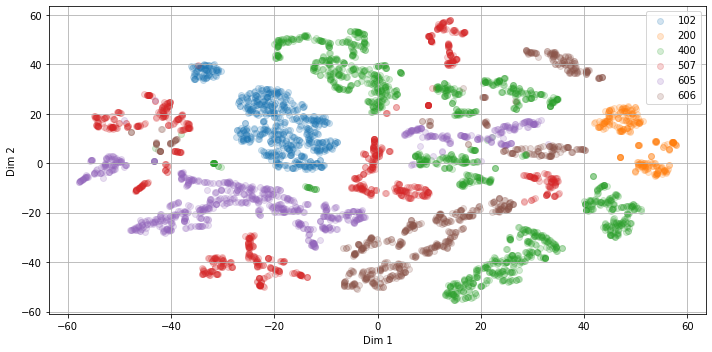

In [44]:
fig, ax = plt.subplots(figsize=(10,5))

#color = ['tab:blue', 'tab:orange', 'tab:green']

i=0
for tag in label:
    ax.scatter(tsne_df[tsne_df['y']==tag]['dim1'], 
               tsne_df[tsne_df['y']==tag]['dim2'], 
               alpha=0.2,
               label=disp_label[i],
               cmap='Spectral')
    i=i+1

ax.legend()
ax.grid(True)
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
#plt.title('Vibration data on T-SNE projection')
plt.tight_layout()
fig.savefig('tsne.png', dpi=300)

plt.show()

# Cross validataion

# Data visualization

In [45]:
list(globals()[label[0]])

tmp_dt = globals()[label[4]]['timestamp']
tmp_dt = tmp_dt.astype('int').astype("datetime64[s]")

tmp = globals()[label[5]].drop(columns=drop_list)
tmp_list = list(tmp)
tmp_list.remove('label')

nd_array = normalizer.transform(tmp.drop(columns=['label']))

df = pd.DataFrame(nd_array, columns = tmp_list)

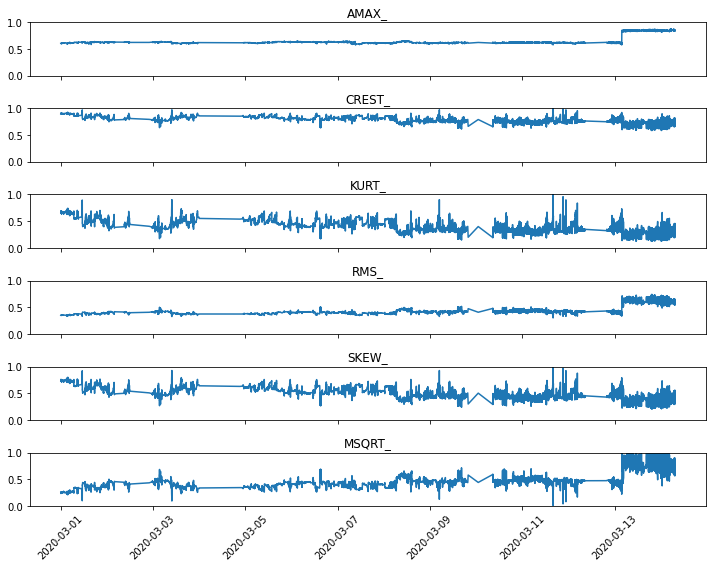

In [46]:
draw_list = ['AMAX_', 'CREST_', 'KURT_', 'RMS_', 'SKEW_', 'MSQRT_']

fig, axs = plt.subplots(6, 1, figsize=(10,8))

axs = axs.ravel()

for i in range(len(draw_list)): 
  axs[i].plot(tmp_dt.head(6000).sort_values(), df[draw_list[i]].head(6000))
  axs[i].set_title(draw_list[i])

  for tick in axs[i].get_xticklabels():
      tick.set_rotation(45)

  axs[i].set_ylim([0, 1])

#for ax in axs.flat:
#    ax.set(xlabel='Time', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()
fig.savefig('features.png', dpi=300)

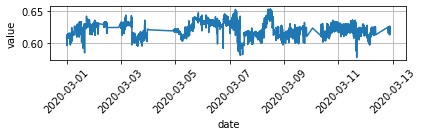

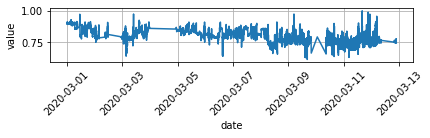

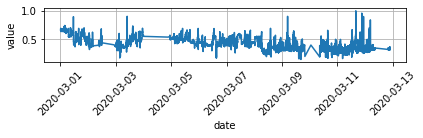

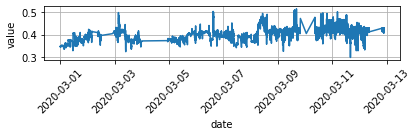

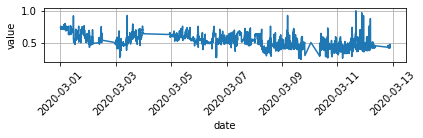

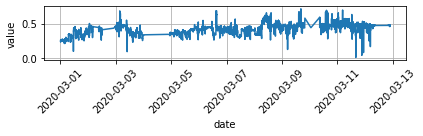

In [63]:

#index = -100

color_index = 0
for draw in draw_list:

    fig, ax = plt.subplots(figsize=(6, 2))
    plt.xticks(rotation=45)

    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.plot(tmp_dt.head(5000).sort_values(), df[draw].head(5000))

    ax.set(xlabel='date', ylabel='value')
    #ax.set_ylim([0, 110])

    #ax.legend(loc=6)
    ax.grid()
    plt.tight_layout()
    #fig.savefig('score.png', dpi=300)

    fig.savefig('feature_'+draw+'.png', dpi=300)
    plt.show()

In [66]:
label[4]

'W4662FM0605'